# Clustering Interpretation with Decision Trees

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
path="/Users/kellyliu/Documents/GitHub/Customer-Personality-Analysis-2.0/Data/Clustered Data/Clustered_Test_Data.csv"
df = pd.read_csv(path)

In [4]:
df.shape

(2231, 49)

In [5]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Clusters,PercentWebpurchases
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,66.666667
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,33.333333
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,44.444444
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,33.333333
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,45.454545


In [6]:
# Check for missing values
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())

ID                          0
Year_Birth                  0
Income                      0
Kidhome                     0
Teenhome                    0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
Enroll_Year                 0
Enroll_Month                0
Enroll_Day                  0
Member_Year                 0
Age                         0
Total_purchase              0
Total_Children              0
Is_Parent 

In [7]:
# Separate features and target variable
X = df.drop(['ID', 'Clusters'], axis=1)  # drop the ID and Clusters column
y = df['Clusters']

# Split the data into training and testing sets for validation purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       109
           1       0.94      0.93      0.94       144
           2       0.96      0.96      0.96       111
           3       0.89      0.88      0.88        81

    accuracy                           0.94       445
   macro avg       0.94      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445



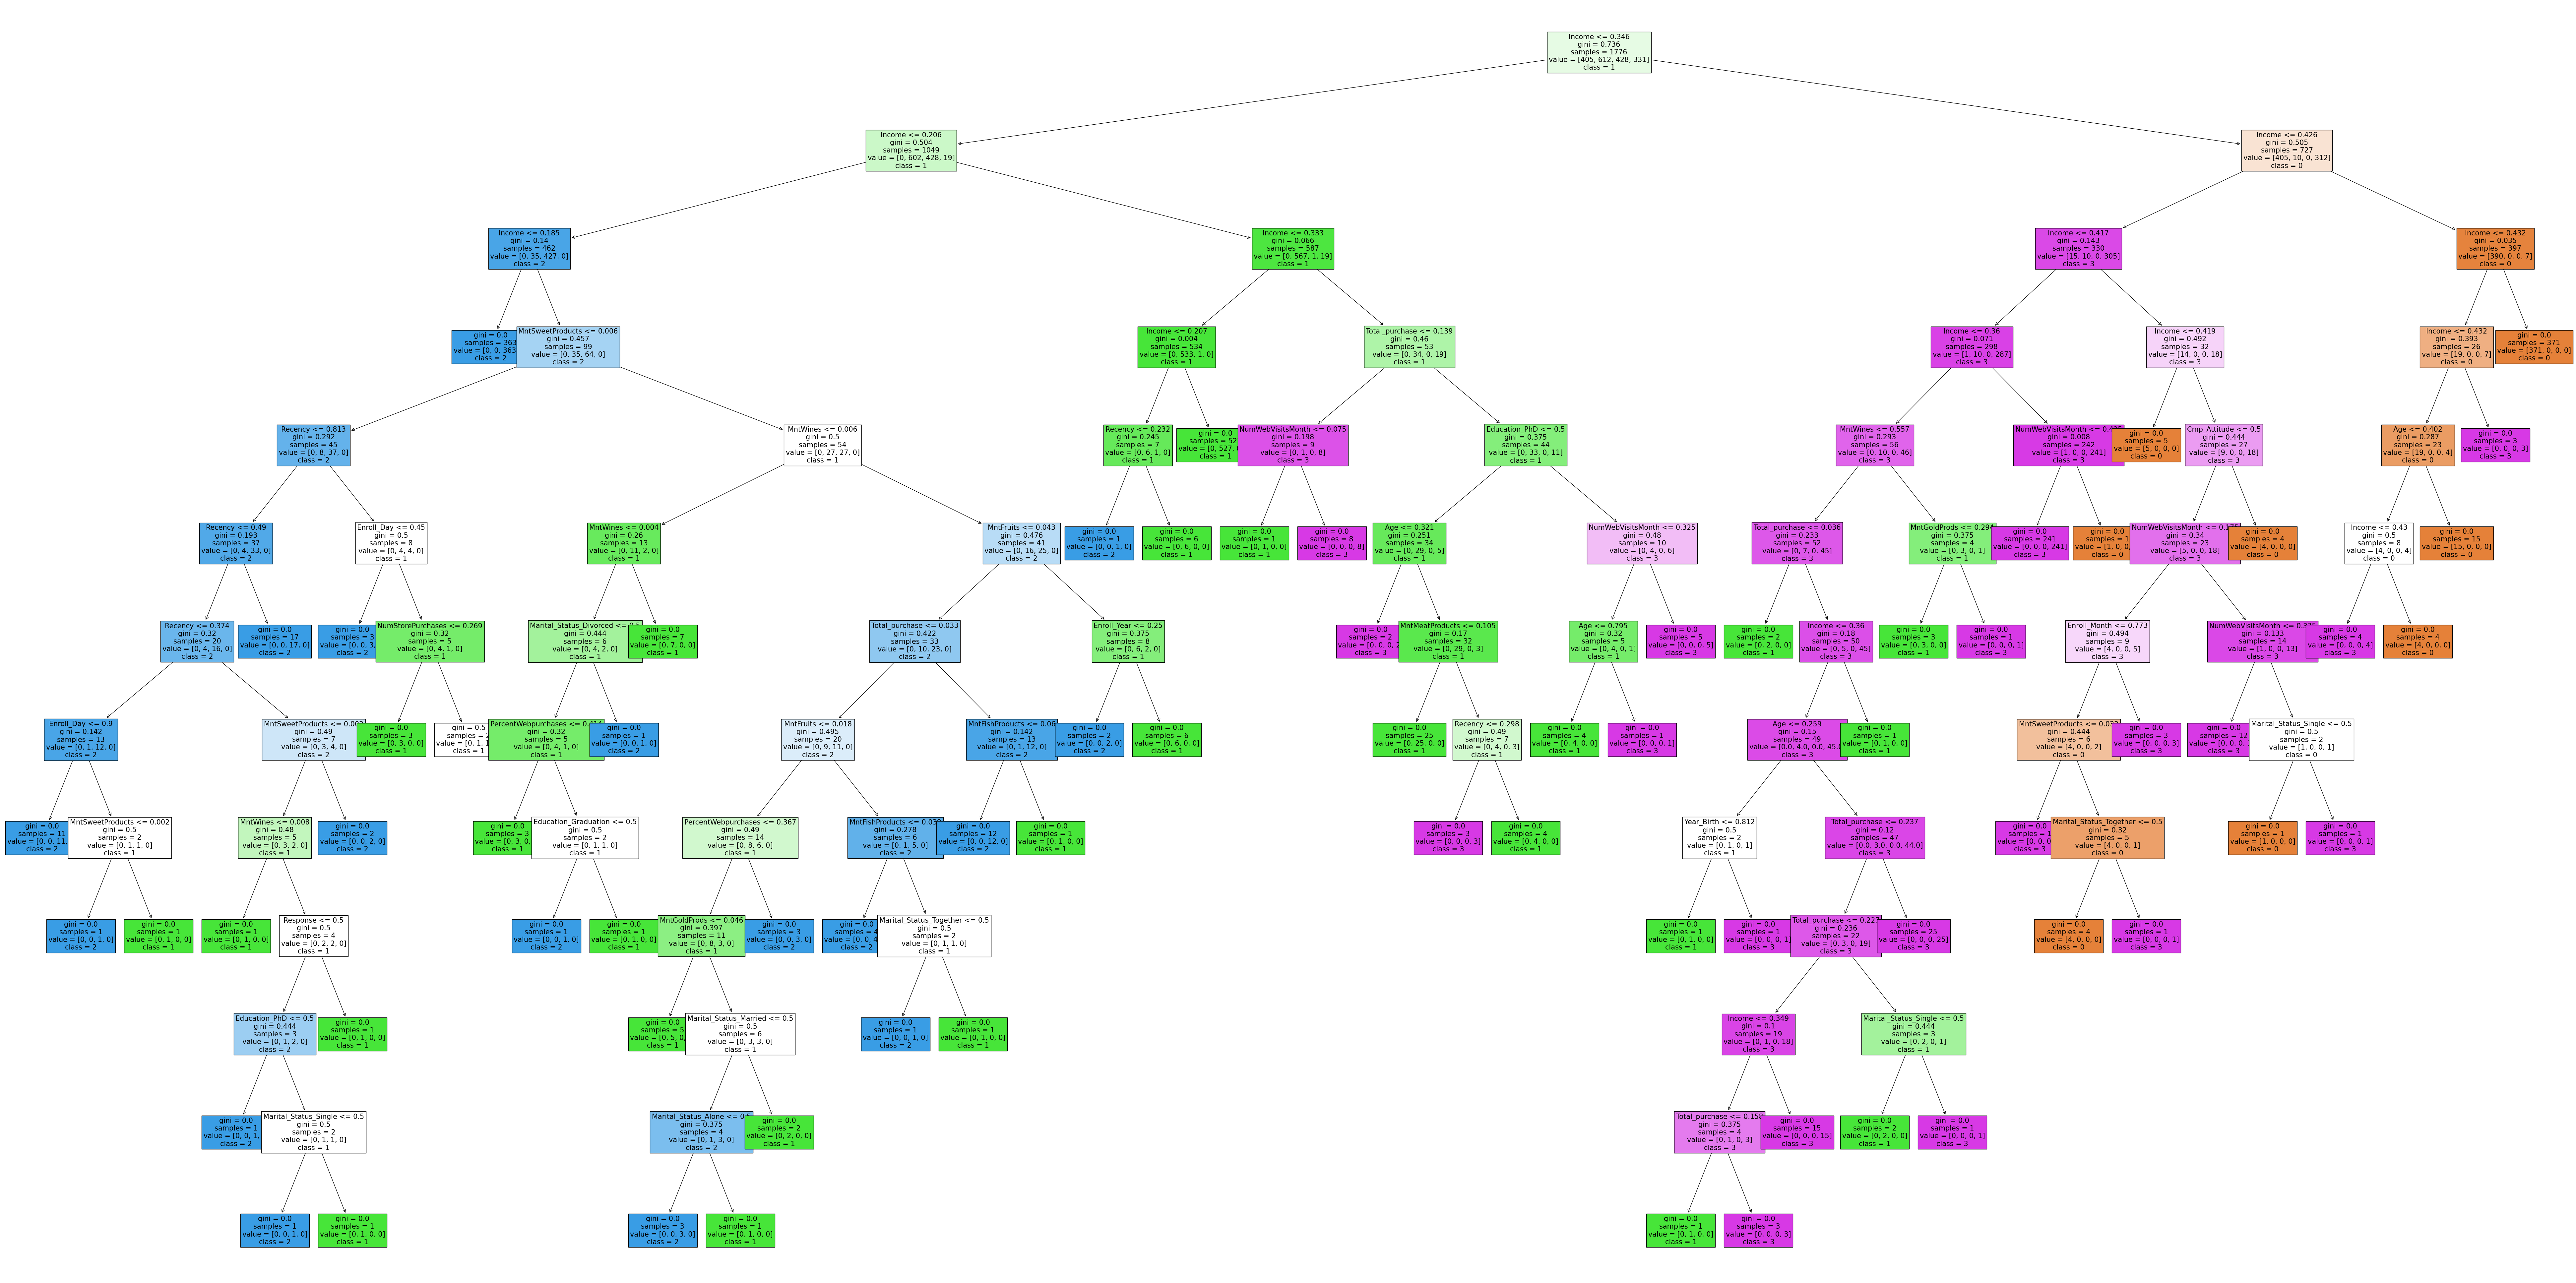

In [12]:
# Training the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = clf.predict(X_test_scaled)

# Printing the classification report
print(classification_report(y_test, y_pred))

# Convert class names to string explicitly to avoid TypeError
class_names_str = np.unique(y).astype(str)

# Attempt to plot the decision tree again with the corrected class names
plt.figure(figsize=(100, 50))
plot_tree(clf, filled=True, fontsize=15, feature_names=X.columns, class_names=class_names_str)
plt.show()

Cross-validation scores: [0.93932584 0.94369369 0.93243243 0.93468468 0.91891892]
Mean cross-validation score: 0.9338111144852718


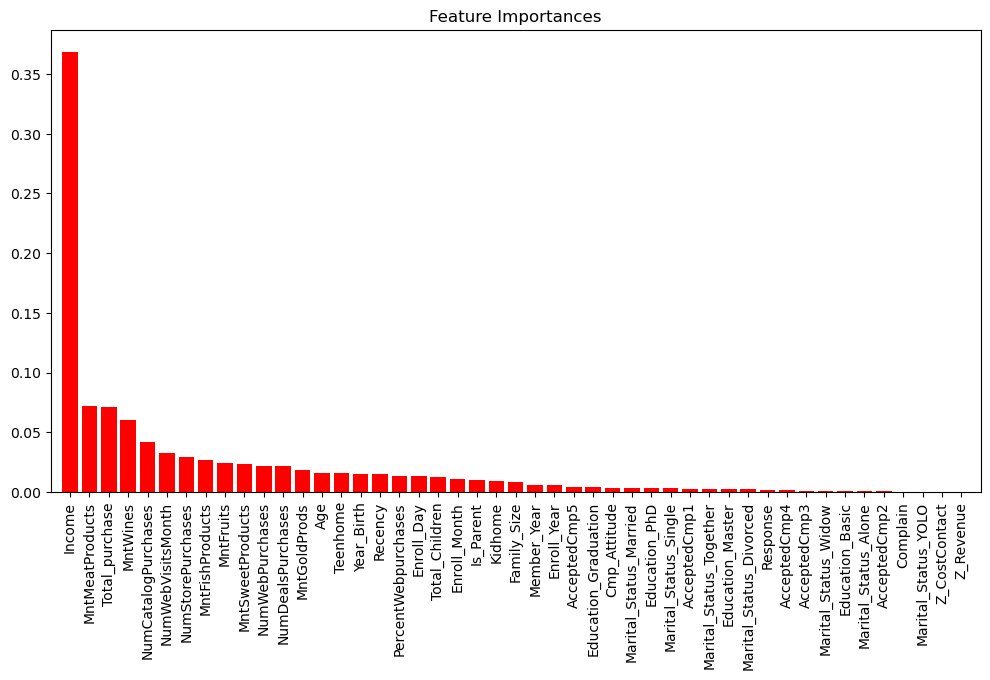

In [ ]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation to assess model reliability
cv_scores = cross_val_score(rf, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the Random Forest Classifier
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Cross-validation scores: [0.94662921 0.91830986 0.96056338 0.94929577 0.95774648]
Mean cross-validation score: 0.9465089412881784


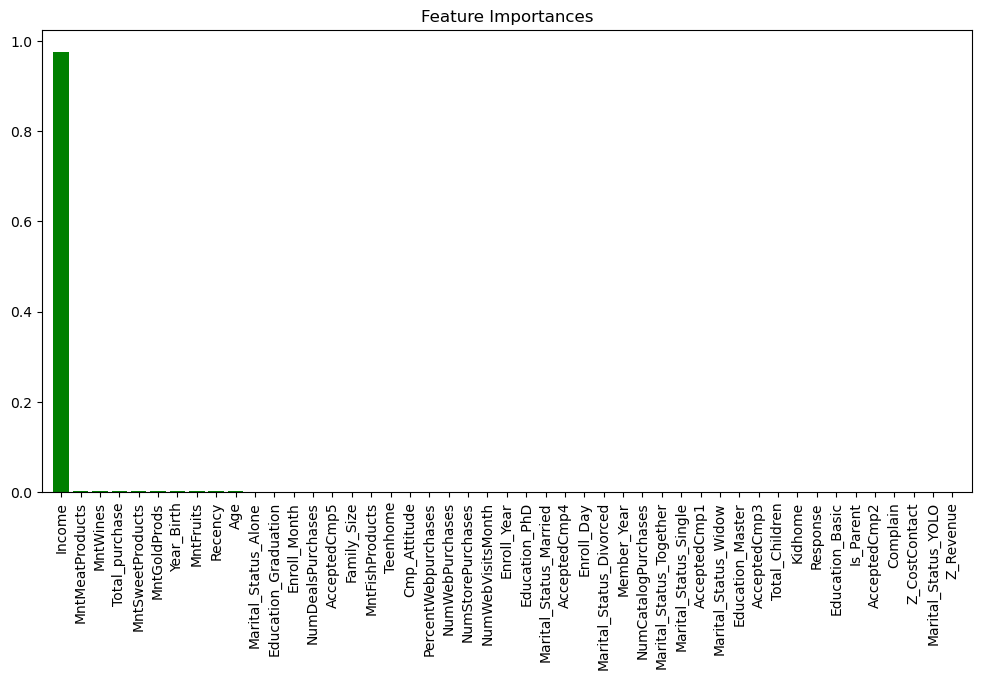

In [ ]:
# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform cross-validation to assess model reliability
cv_scores = cross_val_score(gbm, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the Gradient Boosting Classifier
gbm.fit(X_train, y_train)

# Get feature importances
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color="g", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()